In [1]:
import numpy as np
import pandas as pd
from pandas import Timestamp
from IPython.display import display

import ipyhc as hc

In [2]:
# %load_ext version_information
# %version_information pandas, ipython, jupyter, ezhc 

## Examples
+ reproduced from http://www.highcharts.com/demo/ and http://www.highcharts.com/stock/demo
+ `plot()` has the following arguments:
  + `save=True` and optionally `save_name` and optionally `save_path` (default='saved') will save the graph as a stand alone HTML doc under `save_path` after creating it if necessary
  + `notebook` (default=True) will not inject `require` and `jquery` libs as they are already available in the classical notebook. Set to False to inject them.
  + `version` (default='latest') will specify the highcharts version to use. It is recommended to leave the default value (6.1.2 as of 4sep18).
  + `proxy` (default=None') is necessary if you want to check from [highcharts release page](https://github.com/highcharts/highcharts/releases) what the latest version is, and update the list of all past versions. If no proxy is provided, the versions are [hardcoded](https://github.com/oscar6echo/ezhc/blob/64a1afbfae19197bbef8f8c916347df0c8667643/ezhc/_hc_versions.py#L27) in the source code.
  
+ `options_as_dict()` will return highchart/highstocks options as a Python dictionary
  + args: `chart_id` to specify which div for rendering


+ `options_as_json()` will return highchart/highstocks options as json
  + args: Same save options as `plot()`


## Times series

### Example 1

In [3]:
data = [{'name': 'Track1',
   'yAxis': 0,
   'data': [[Timestamp('2015-01-01 00:00:00', freq='B'), 1.0],
    [Timestamp('2015-01-02 00:00:00', freq='B'), 0.9955809138122033],
    [Timestamp('2015-01-05 00:00:00', freq='B'), 0.9725156536640029],
    [Timestamp('2015-01-06 00:00:00', freq='B'), 0.9555008659684235],
    [Timestamp('2015-01-07 00:00:00', freq='B'), 0.9735852580931271],
    [Timestamp('2015-01-08 00:00:00', freq='B'), 0.9709321132210923],
    [Timestamp('2015-01-09 00:00:00', freq='B'), 0.9726862121296252],
    [Timestamp('2015-01-12 00:00:00', freq='B'), 0.9570236218094534],
    [Timestamp('2015-01-13 00:00:00', freq='B'), 0.9442796901261044],
    [Timestamp('2015-01-14 00:00:00', freq='B'), 0.9139256061055365],
    [Timestamp('2015-01-15 00:00:00', freq='B'), 0.9069001469685026],
    [Timestamp('2015-01-16 00:00:00', freq='B'), 0.9220566792158227],
    [Timestamp('2015-01-19 00:00:00', freq='B'), 0.9323895174200195],
    [Timestamp('2015-01-20 00:00:00', freq='B'), 0.9221882459625789],
    [Timestamp('2015-01-21 00:00:00', freq='B'), 0.907404366111972]]},
  {'name': 'Track2',
   'yAxis': 0,
   'data': [[Timestamp('2015-01-01 00:00:00', freq='B'), 1.0],
    [Timestamp('2015-01-02 00:00:00', freq='B'), 0.9933897589049112],
    [Timestamp('2015-01-05 00:00:00', freq='B'), 1.0021180625281059],
    [Timestamp('2015-01-06 00:00:00', freq='B'), 1.0063755870959292],
    [Timestamp('2015-01-07 00:00:00', freq='B'), 0.9895080760415528],
    [Timestamp('2015-01-08 00:00:00', freq='B'), 0.9791839708651677],
    [Timestamp('2015-01-09 00:00:00', freq='B'), 0.9808684145393846],
    [Timestamp('2015-01-12 00:00:00', freq='B'), 0.9585991659947815],
    [Timestamp('2015-01-13 00:00:00', freq='B'), 0.9663917938818657],
    [Timestamp('2015-01-14 00:00:00', freq='B'), 0.9724325877021651],
    [Timestamp('2015-01-15 00:00:00', freq='B'), 0.9811292493280032],
    [Timestamp('2015-01-16 00:00:00', freq='B'), 0.9553434953423843],
    [Timestamp('2015-01-19 00:00:00', freq='B'), 0.9400325607426828],
    [Timestamp('2015-01-20 00:00:00', freq='B'), 0.934605587680784],
    [Timestamp('2015-01-21 00:00:00', freq='B'), 0.9179372034526284]]}]

options = {'credits': {'enabled': True,
  'text': 'Source: XXX Flow Strategy & Solutions.',
  'href': 'http://www.example.com'},
 'exporting': {'enabled': True},
 'chart': {'animation': False,
  'zoomType': 'xy',
  'renderTo': 'chart_id'},
 'plotOptions': {'series': {'animation': False, 'compare': 'percent'},
  'line': {'animation': False},
  'column': {'animation': False}},
 'legend': {'enabled': True,
  'layout': 'horizontal',
  'align': 'center',
  'maxHeight': 100},
 'tooltip': {'enabled': True,
  'valueDecimals': 2,
  'pointFormat': '<span style="color:{series.color}">{series.name}</span>: <b>{point.y}</b> ({point.change}%)<br/>',
  'positioner': "function (labelWidth, labelHeight, point) {\n    var roundUp100 = function(d) { return 100*Math.floor(d/100); },\n        labelWidth = roundUp100(labelWidth),\n        chart = window.charts['__uuid__'];\n\n    var tooltipX, tooltipY;\n        var testX = (point.plotX + labelWidth * 0.7 > chart.plotWidth / 2) && (point.plotX - labelWidth * 0.7 < chart.plotWidth / 2);\n        var testY = point.plotY < labelHeight * 0.7;\n\n    if (testX && testY) {\n                tooltipX = chart.plotLeft + (chart.plotWidth - labelWidth) / 2;\n        tooltipY = chart.plotTop + chart.plotHeight - labelHeight;\n    } else {\n                tooltipX = chart.plotLeft + (chart.plotWidth - labelWidth) / 2;\n        tooltipY = chart.plotTop;\n    }\n\n    return {\n        x: tooltipX,\n        y: tooltipY\n    };\n}\n\n"},
 'title': {'text': 'Time series plotted with HighStock'},
 'subtitle': {'text': 'Transparent access to the underlying js lib'},
 'yAxis': {'labels': {'formatter': "function() { return (this.value > 0 ? ' + ' : '') + this.value + '%'; }\n"},
  'gridLineWidth': 1.0,
  'gridLineDashStyle': 'Dot'},
 'xAxis': {'gridLineWidth': 1.0, 'gridLineDashStyle': 'Dot'} }

hc.Chart(height = 550, stock = True, data = data, options = options)


Chart(height='550px', stock=True, width='100%')

In [4]:
df = hc.sample.df_timeseries(N=2, Nb_bd=15+0*3700) #<=473
df.info()
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15 entries, 2015-01-01 to 2015-01-21
Freq: B
Data columns (total 2 columns):
Track1    15 non-null float64
Track2    15 non-null float64
dtypes: float64(2)
memory usage: 360.0 bytes


Track1    Track2
2015-01-01  1.000000  1.000000
2015-01-02  0.995581  0.993390
2015-01-05  0.972516  1.002118
2015-01-06  0.955501  1.006376
2015-01-07  0.973585  0.989508

Track1    Track2
2015-01-15  0.906900  0.981129
2015-01-16  0.922057  0.955343
2015-01-19  0.932390  0.940033
2015-01-20  0.922188  0.934606
2015-01-21  0.907404  0.917937

In [5]:
options_as_dict = g.options_as_dict()
options_as_dict

NameError: name 'g' is not defined

In [6]:
options_as_json = g.options_as_json()
options_as_json

NameError: name 'g' is not defined

### Example 2

In [7]:
df = hc.sample.df_timeseries(N=3, Nb_bd=2000)
df['Cash'] = 1.0+0.02/260
df['Cash'] = df['Cash'].cumprod()
display(df.head())
display(df.tail())

Track1    Track2    Track3      Cash
2015-01-01  1.000000  1.000000  1.000000  1.000077
2015-01-02  0.995581  1.005348  0.966949  1.000154
2015-01-05  0.972516  1.010849  0.989969  1.000231
2015-01-06  0.955501  1.029556  0.982879  1.000308
2015-01-07  0.973585  1.016824  0.973665  1.000385

Track1    Track2    Track3      Cash
2022-08-25  0.529755  1.523684  0.824704  1.165946
2022-08-26  0.539018  1.538276  0.820019  1.166035
2022-08-29  0.540658  1.536633  0.812321  1.166125
2022-08-30  0.555569  1.532476  0.818423  1.166215
2022-08-31  0.546018  1.506516  0.828384  1.166305

In [8]:
g = hc.Highstock()

g.chart.height = 550
g.legend.enabled = True
g.legend.layout = 'horizontal'
g.legend.align = 'center'
g.legend.maxHeight = 100
g.tooltip.enabled = True
g.tooltip.valueDecimals = 2
g.exporting.enabled = True

g.chart.zoomType = 'xy'
g.title.text = 'Time series plotted with HighStock'
g.subtitle.text = 'Transparent access to the underlying js lib'

g.plotOptions.series.compare = 'percent'
g.yAxis.labels.formatter = hc.scripts.FORMATTER_PERCENT
g.tooltip.pointFormat = hc.scripts.TOOLTIP_POINT_FORMAT_PERCENT
g.tooltip.positioner = hc.scripts.TOOLTIP_POSITIONER_CENTER_TOP

g.xAxis.gridLineWidth = 1.0
g.xAxis.gridLineDashStyle = 'Dot'
g.yAxis.gridLineWidth = 1.0
g.yAxis.gridLineDashStyle = 'Dot'

g.credits.enabled = True
g.credits.text = 'Source: XXX Flow Strategy & Solutions.'
g.credits.href = 'http://www.example.com'


g.series = hc.build.series(df, visible={'Track3': False})


g.plot(save=True, save_name='NoTable')

AttributeError: module 'ipyhc' has no attribute 'Highstock'

In [9]:
data_2 = [{'name': 'Track1',
   'yAxis': 0,
   'data': [[Timestamp('2015-01-01 00:00:00', freq='B'), 1.0],
    [Timestamp('2015-01-02 00:00:00', freq='B'), 0.9955809138122033],
    [Timestamp('2015-01-05 00:00:00', freq='B'), 0.9725156536640029],
    [Timestamp('2015-01-06 00:00:00', freq='B'), 0.9555008659684235],
    [Timestamp('2015-01-07 00:00:00', freq='B'), 0.9735852580931271],
    [Timestamp('2015-01-08 00:00:00', freq='B'), 0.9709321132210923],
    [Timestamp('2015-01-09 00:00:00', freq='B'), 0.9726862121296252],
    [Timestamp('2015-01-12 00:00:00', freq='B'), 0.9570236218094534],
    [Timestamp('2015-01-13 00:00:00', freq='B'), 0.9442796901261044],
    [Timestamp('2015-01-14 00:00:00', freq='B'), 0.9139256061055365],
    [Timestamp('2015-01-15 00:00:00', freq='B'), 0.9069001469685026],
    [Timestamp('2015-01-16 00:00:00', freq='B'), 0.9220566792158227],
    [Timestamp('2015-01-19 00:00:00', freq='B'), 0.9323895174200195],
    [Timestamp('2015-01-20 00:00:00', freq='B'), 0.9221882459625789],
    [Timestamp('2015-01-21 00:00:00', freq='B'), 0.907404366111972]]},
  {'name': 'Track2',
   'yAxis': 0,
   'data': [[Timestamp('2015-01-01 00:00:00', freq='B'), 1.0],
    [Timestamp('2015-01-02 00:00:00', freq='B'), 0.9933897589049112],
    [Timestamp('2015-01-05 00:00:00', freq='B'), 1.0021180625281059],
    [Timestamp('2015-01-06 00:00:00', freq='B'), 1.0063755870959292],
    [Timestamp('2015-01-07 00:00:00', freq='B'), 0.9895080760415528],
    [Timestamp('2015-01-08 00:00:00', freq='B'), 0.9791839708651677],
    [Timestamp('2015-01-09 00:00:00', freq='B'), 0.9808684145393846],
    [Timestamp('2015-01-12 00:00:00', freq='B'), 0.9585991659947815],
    [Timestamp('2015-01-13 00:00:00', freq='B'), 0.9663917938818657],
    [Timestamp('2015-01-14 00:00:00', freq='B'), 0.9724325877021651],
    [Timestamp('2015-01-15 00:00:00', freq='B'), 0.9811292493280032],
    [Timestamp('2015-01-16 00:00:00', freq='B'), 0.9553434953423843],
    [Timestamp('2015-01-19 00:00:00', freq='B'), 0.9400325607426828],
    [Timestamp('2015-01-20 00:00:00', freq='B'), 0.934605587680784],
    [Timestamp('2015-01-21 00:00:00', freq='B'), 0.9179372034526284]]}]

options_2 = {'credits': {'enabled': True,
  'text': 'Source: XXX Flow Strategy & Solutions.',
  'href': 'http://www.example.com'},
 'exporting': {'enabled': True},
 'chart': {'animation': False,
  'height': 550,
  'zoomType': 'xy',
  'renderTo': 'chart_id'},
 'plotOptions': {'series': {'animation': False, 'compare': 'percent'},
  'line': {'animation': False},
  'column': {'animation': False}},
 'legend': {'enabled': True,
  'layout': 'horizontal',
  'align': 'center',
  'maxHeight': 100},
 'tooltip': {'enabled': True,
  'valueDecimals': 2,
  'pointFormat': '<span style="color:{series.color}">{series.name}</span>: <b>{point.y}</b> ({point.change}%)<br/>',
  'positioner': "function (labelWidth, labelHeight, point) {\n    var roundUp100 = function(d) { return 100*Math.floor(d/100); },\n        labelWidth = roundUp100(labelWidth),\n        chart = window.charts['__uuid__'];\n\n    var tooltipX, tooltipY;\n        var testX = (point.plotX + labelWidth * 0.7 > chart.plotWidth / 2) && (point.plotX - labelWidth * 0.7 < chart.plotWidth / 2);\n        var testY = point.plotY < labelHeight * 0.7;\n\n    if (testX && testY) {\n                tooltipX = chart.plotLeft + (chart.plotWidth - labelWidth) / 2;\n        tooltipY = chart.plotTop + chart.plotHeight - labelHeight;\n    } else {\n                tooltipX = chart.plotLeft + (chart.plotWidth - labelWidth) / 2;\n        tooltipY = chart.plotTop;\n    }\n\n    return {\n        x: tooltipX,\n        y: tooltipY\n    };\n}\n\n"},
 'title': {'text': 'Time series plotted with HighStock'},
 'subtitle': {'text': 'Transparent access to the underlying js lib'},
 'yAxis': {'labels': {'formatter': "function() { return (this.value > 0 ? ' + ' : '') + this.value + '%'; }\n"},
  'gridLineWidth': 1.0,
  'gridLineDashStyle': 'Dot'},
 'xAxis': {'gridLineWidth': 1.0, 'gridLineDashStyle': 'Dot'}}
             
hc.Chart(height = 550, stock = True, data = data_2, options = options_2)


Chart(height='550px', stock=True, width='100%')

### Example 3

### Exception
+ The function2 `plot_with_table1()` and `plot_with_table2()` are exceptions with respect to the idea of this module: It is NOT just transparent access to Highchart/Highstock. I added a table (based on datatable.net) to display more data about the period selected. This measurements cannot be calculated beforehand, so it has to be postprocessing.  
+ If `save=True` function `plot_with_table1/2()` will create a standalone HTML file containing the output in subdirectory 'saved'. Optionally `save_name` can be set - an automatic time tag is added to keep things orderly, unless `dated=False`.  
+ **NOTE**: Because of css collision between notebook and datatable, the table in the saved file is better looking than in the notebook output area.


In [10]:
g.plot_with_table_1(dated=False, save=True, save_name='Table1')

NameError: name 'g' is not defined

### Example 4

### Footer
+ A footer can be added to the plot. This is interesting if the plot is saved as a stand alone file.
+ The footer is HTML you can write from scratch but a helper function and a jinja template make it easy.
+ Images are embeded upon save so the saved file is standalone. Only an internet connection is required to download the js libraries.


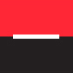

In [10]:
g.plotOptions.series.compare = 'value'
g.yAxis.labels.formatter = hc.scripts.FORMATTER_BASIC
g.tooltip.pointFormat = hc.scripts.TOOLTIP_POINT_FORMAT_BASIC
g.tooltip.formatter = hc.scripts.FORMATTER_QUANTILE

disclaimer = """
THE VALUE OF YOUR INVESTMENT MAY FLUCTUATE. 
THE FIGURES RELATING TO SIMULATED PAST PERFORMANCES REFER TO PAST 
PERIODS AND ARE NOT A RELIABLE INDICATOR OF FUTURE RESULTS. 
THIS ALSO APPLIES TO HISTORICAL MARKET DATA.
"""
template_footer = hc.scripts.TEMPLATE_DISCLAIMER
create_footer = hc.scripts.from_template

logo_path = hc.scripts.PATH_TO_LOGO_SG
# logo_path = 'http://img.talkandroid.com/uploads/2015/11/Chrome-Logo.png'
# logo_path = hc.scripts.image_src('http://img.talkandroid.com/uploads/2015/11/Chrome-Logo.png')

footer = create_footer(template_footer, comment=disclaimer, img_logo=logo_path)

g.plot_with_table_2(dated=False, save=True, save_name='Table2', footer=footer)

## Column, Bar

In [11]:
df = hc.sample.df_one_idx_several_col()
df

Jane  Joe  John
Fruit                   
Apples      2    3     5
Oranges     2    4     3
Pears       3    4     4
Grapes      2    2     7
Bananas     1    5     2

In [12]:
g = hc.Highcharts()

g.chart.type = 'column'
g.chart.width = 500
g.chart.height = 300
# g.plotOptions.column.animation = False

g.title.text = 'Basic Bar Chart'
g.yAxis.title.text = 'Fruit Consumption'

g.xAxis.categories = list(df.index)
g.series = hc.build.series(df)

g.plot(center=True, save=True, save_name='test', dated=False)

In [13]:
g.plotOptions.column.stacking = 'normal'
g.title.text = 'Stack Bar Chart'
g.yAxis.title.text = 'Total Fruit Consumption'

g.plot()

In [14]:
g.plotOptions.column.stacking = 'percent'
g.yAxis.title.text = 'Fruit Consumption Distribution'

g.plot()

In [15]:
g = hc.Highcharts()

g.chart.type = 'bar'
g.chart.width = 500
g.chart.height = 400

g.title.text = 'Basic Bar Chart'
g.xAxis.title.text = 'Fruit Consumption'

g.xAxis.categories = list(df.index)
g.series = hc.build.series(df)

g.plot()

In [16]:
g.plotOptions.bar.stacking = 'normal'

g.title.text = 'Stacked Bar Chart'
g.xAxis.title.text = 'Total Fruit Consumption'

g.plot()

In [17]:
g.plotOptions.bar.stacking = 'percent'

g.title.text = 'Stacked Bar Chart'
g.xAxis.title.text = 'Fruit Consumption Distribution'

g.plot()

## Pie

In [18]:
df = hc.sample.df_one_idx_one_col()
df

MktShare
Brand            
Firefox      45.0
IE           26.8
Chrome       12.8
Safari        8.5
Opera         6.2
Others        0.7

In [11]:
g = hc.Highcharts()

g.chart.type = 'pie'
g.chart.width = 400
g.chart.height = 400
gpo = g.plotOptions.pie
gpo.showInLegend = True
gpo.dataLabels.enabled = False

g.title.text = 'Browser Market Share'

g.series = hc.build.series(df)

g.plot()

AttributeError: module 'ipyhc' has no attribute 'Highcharts'

In [20]:
g.chart.width = 400
g.chart.height = 300

gpo.showInLegend = False
gpo.dataLabels.enabled = True

gpo.startAngle = -90
gpo.endAngle = 90
gpo.innerSize = '40%'
gpo.center = ['50%', '95%']

g.plot()

## Pie, Column Drilldown

In [21]:
df = hc.sample.df_two_idx_one_col()
df.head()

Market Share
Brand             Version              
Internet Explorer 6.0              6.40
                  7.0              3.55
                  8.0             26.70
                  9.0             16.96
Firefox           2.0              0.09

In [22]:
g = hc.Highcharts()

g.chart.type = 'pie'
g.chart.width = 500
g.chart.height = 500
g.exporting = False
gpo = g.plotOptions.pie
gpo.showInLegend = False
gpo.dataLabels.enabled = True
gpo.center = ['50%', '50%']
gpo.size = '65%'
g.drilldown.drillUpButton.position = {'x': 0, 'y': 0}

g.title.text = 'Browser Market Share'

g.series, g.drilldown.series = hc.build.series_drilldown(df)

g.plot()

In [23]:
g = hc.Highcharts()

g.chart.type = 'bar'
g.chart.width = 500
g.chart.height = 500
g.exporting = False
gpo = g.plotOptions.pie
gpo.showInLegend = False
gpo.dataLabels.enabled = True
gpo.center = ['50%', '50%']
gpo.size = '65%'
g.drilldown.drillUpButton.position = {'x': 0, 'y': 0}

g.title.text = 'Browser Market Share'

g.series, g.drilldown.series = hc.build.series_drilldown(df)

g.plot()

## Pie Drilldown - 3 levels
+ Any number of levels works

In [24]:
df = hc.sample.df_several_idx_one_col_2()
df.head()

Population
Continent Region         Country                             
Africa    Central Africa Angola                    29784193.0
                         Cameroon                  24053727.0
                         Central African Republic   4659080.0
                         Chad                      14899994.0
                         Congo                      5260750.0

In [25]:
g = hc.Highcharts()

g.chart.type = 'pie'
g.chart.width = 500
g.chart.height = 500
g.exporting = False
gpo = g.plotOptions.pie
gpo.showInLegend = False
gpo.dataLabels.enabled = True
gpo.center = ['50%', '50%']
gpo.size = '65%'
g.drilldown.drillUpButton.position = {'x': 0, 'y': 0}

g.title.text = 'World Population'

g.series, g.drilldown.series = hc.build.series_drilldown(df, top_name='World')

g.plot()

## Column Range

In [26]:
df = hc.sample.df_one_idx_two_col()
df.head()

Min   Max
Month           
Jan   -9.7   9.4
Feb   -8.7   6.5
Mar   -3.5   9.4
Apr   -1.4  19.9
May    0.0  22.6

In [27]:
g = hc.Highcharts()
g.chart.type = 'columnrange'
g.chart.inverted = True
g.chart.width = 700
g.chart.height = 400
gpo = g.plotOptions.columnrange
gpo.dataLabels.enabled = True
gpo.dataLabels.formatter = 'function() { return this.y + "°C"; }'
g.tooltip.valueSuffix = '°C'
g.xAxis.categories, g.series = hc.build.series_range(df)
g.series[0]['name'] = 'Temperature'
g.yAxis.title.text = 'Temperature (°C)'
g.xAxis.title.text = 'Month'
g.title.text = 'Temperature Variations by Month'
g.subtitle.text = 'Vik, Norway'

g.legend.enabled = False

g.plot(save=True, save_name='index', dated=False, notebook=False)

## Scatter - 1

In [28]:
df = hc.sample.df_scatter()
df.head()

Sex
Height Weight        
161.2  51.6    Female
167.5  59.0    Female
159.5  49.2    Female
157.0  63.0    Female
155.8  53.6    Female

In [29]:
g = hc.Highcharts()
g.chart.type = 'scatter'
g.chart.width = 700
g.chart.height = 500
g.chart.zoomType = 'xy'
g.exporting = False

g.plotOptions.scatter.marker.radius = 5

g.tooltip.headerFormat = '<b>Sex: {series.name}</b><br>'
g.tooltip.pointFormat = '{point.x} cm, {point.y} kg'

g.legend.layout = 'vertical'
g.legend.align = 'left'
g.legend.verticalAlign = 'top'
g.legend.x = 100
g.legend.y = 70
g.legend.floating = True
g.legend.borderWidth = 1
                
g.xAxis.title.text = 'Height (cm)'
g.yAxis.title.text = 'Weight (kg)'
g.title.text = 'Height Versus Weight of 507 Individuals by Gender'
g.subtitle.text = 'Source: Heinz 2003'
                
g.series = hc.build.series_scatter(df, color_column='Sex',
                                   color={'Female': 'rgba(223, 83, 83, .5)',
                                          'Male': 'rgba(119, 152, 191, .5)'})
g.plot()

## Scatter - 2

In [30]:
df = hc.sample.df_scatter()
df['Tag'] = np.random.choice(range(int(1e5)), size=len(df), replace=False)
df.head()

Sex    Tag
Height Weight               
161.2  51.6    Female  18990
167.5  59.0    Female  57774
159.5  49.2    Female  10695
157.0  63.0    Female   1706
155.8  53.6    Female  64970

In [31]:
g = hc.Highcharts()
g.chart.type = 'scatter'
g.chart.width = 700
g.chart.height = 500
g.chart.zoomType = 'xy'
g.exporting = False

g.plotOptions.scatter.marker.radius = 5

g.tooltip.headerFormat = '<b>Sex: {series.name}</b><br><b>Tag: {point.key}</b><br>'
g.tooltip.pointFormat = '{point.x} cm, {point.y} kg'

g.legend.layout = 'vertical'
g.legend.align = 'left'
g.legend.verticalAlign = 'top'
g.legend.x = 100
g.legend.y = 70
g.legend.floating = True
g.legend.borderWidth = 1
                
g.xAxis.title.text = 'Height (cm)'
g.yAxis.title.text = 'Weight (kg)'
g.title.text = 'Height Versus Weight of 507 Individuals by Gender'
g.subtitle.text = 'Source: Heinz 2003'
                
g.series = hc.build.series_scatter(df, color_column='Sex', title_column='Tag',
                                   color={'Female': 'rgba(223, 83, 83, .5)',
                                          'Male': 'rgba(119, 152, 191, .5)'})
g.plot()

## Bubble

In [32]:
df = hc.sample.df_bubble()
df.head()

Size
Cat  x  y       
Cat1 97 36    79
     94 74    60
     68 76    58
     64 87    56
     68 27    73

In [33]:
g = hc.Highcharts()
g.chart.type = 'bubble'
g.chart.width = 700
g.chart.height = 500
g.chart.zoomType = 'xy'
g.plotOptions.bubble.minSize = 20
g.plotOptions.bubble.maxSize = 60
g.legend.enabled = True
g.title.text = 'Bubbles'

g.series = hc.build.series_bubble(df, color={'A': 'rgba(223, 83, 83, .5)', 'B': 'rgba(119, 152, 191, .5)'})

g.plot()

## Treemap
+ Building the points datastructure cannot be wrapped without losing flexibility
+ Example (data and points datastructure taken from http://jsfiddle.net/gh/get/jquery/1.9.1/highslide-software/highcharts.com/tree/master/samples/highcharts/demo/treemap-large-dataset/


In [34]:
df = hc.sample.df_several_idx_one_col()
df.head()

Value
Region Country Cause                          
Africa Algeria Communicable diseases      97.8
               Injuries                   53.8
               Noncommunicable diseases  710.4
       Angola  Communicable diseases     873.3
               Injuries                  137.8

In [35]:
colors = ['#7cb5ec', '#434348', '#90ed7d', '#f7a35c', '#8085e9',
          '#f15c80', '#e4d354', '#2b908f', '#f45b5b', '#91e8e1']

points = hc.build.series_tree(df, set_color=True, colors=colors, set_value=True, precision=2)
points[:5]

[{'name': 'Communicable diseases',
  'value': 97.8,
  'id': '0.0.0.0',
  'parent': '0.0.0'},
 {'name': 'Injuries', 'value': 53.8, 'id': '0.0.0.1', 'parent': '0.0.0'},
 {'name': 'Noncommunicable diseases',
  'value': 710.4,
  'id': '0.0.0.2',
  'parent': '0.0.0'},
 {'name': 'Algeria', 'id': '0.0.0', 'parent': '0.0', 'value': 862.0},
 {'name': 'Communicable diseases',
  'value': 873.3,
  'id': '0.0.1.0',
  'parent': '0.0.1'}]

In [36]:
g = hc.Highcharts()

g.chart.type = 'treemap'
g.chart.width = 900
g.chart.height = 600

g.title.text = 'Global Mortality Rate 2012, per 100 000 population'
g.subtitle.text = 'Click points to drill down.\nSource: \
                  <a href="http://apps.who.int/gho/data/node.main.12?lang=en">WHO</a>.'
g.exporting = False

g.series = [{
    'type': "treemap",
    'layoutAlgorithm': 'squarified',
    'allowDrillToNode': True,
    'dataLabels': {
        'enabled': False
    },
    'levelIsConstant': False,
    'levels': [{
        'level': 1,
        'dataLabels': {
            'enabled': True
        },
        'borderWidth': 3
    }],
    'data': points,
}]

g.plot()

## Sunburst - 2 levels

In [37]:
df = hc.sample.df_two_idx_one_col()
df.head()

Market Share
Brand             Version              
Internet Explorer 6.0              6.40
                  7.0              3.55
                  8.0             26.70
                  9.0             16.96
Firefox           2.0              0.09

In [38]:
points = hc.build.series_tree(df, set_total=True, name_total='Total',
                              set_color=False,
                              set_value=False, precision=2)
points[:5]

[{'id': '0', 'name': 'Total'},
 {'name': '10', 'value': 0.09, 'id': '0.0.0', 'parent': '0.0'},
 {'name': '11', 'value': 0.1, 'id': '0.0.1', 'parent': '0.0'},
 {'name': '12', 'value': 0.16, 'id': '0.0.2', 'parent': '0.0'},
 {'name': '13', 'value': 0.13, 'id': '0.0.3', 'parent': '0.0'}]

In [39]:
g = hc.Highcharts()

g.chart.type = 'sunburst'
g.title.text = 'Browser Market Share'
g.plotOptions.series.animation = True
g.chart.height = '80%'
g.chart.animation = True
g.exporting = False
g.tooltip = {
    'headerFormat': "",
    'pointFormat': '<b>{point.name}</b> Market Share is <b>{point.value:,.3f}</b>'
}
g.series =  [{
    'type': 'sunburst',
    'data': points,
    'allowDrillToNode': True,
    'cursor': 'pointer',
    'dataLabels': {
        'format': '{point.name}',
        'filter': {
            'property': 'innerArcLength',
            'operator': '>',
            'value': 16
        }
    },
    'levels': [{
        'level': 2,
        'colorByPoint': True,
        'dataLabels': {
            'rotationMode': 'parallel'
        }
    },
    {
        'level': 3,
        'colorVariation': {
            'key': 'brightness',
            'to': -0.5
        }
    }, {
        'level': 4,
        'colorVariation': {
            'key': 'brightness',
            'to': 0.5
        }
    }]

}]

g.plot()

## Sunburst - 3 levels
+ Any number of levels works

In [40]:
df = hc.sample.df_several_idx_one_col_2()
df.head()

Population
Continent Region         Country                             
Africa    Central Africa Angola                    29784193.0
                         Cameroon                  24053727.0
                         Central African Republic   4659080.0
                         Chad                      14899994.0
                         Congo                      5260750.0

In [41]:
points = hc.build.series_tree(df, set_total=True, name_total='World',
                              set_value=False, set_color=False, precision=0)
points[:5]

[{'id': '0', 'name': 'World'},
 {'name': 'Angola', 'value': 29784193.0, 'id': '0.0.0.0', 'parent': '0.0.0'},
 {'name': 'Cameroon', 'value': 24053727.0, 'id': '0.0.0.1', 'parent': '0.0.0'},
 {'name': 'Central African Republic',
  'value': 4659080.0,
  'id': '0.0.0.2',
  'parent': '0.0.0'},
 {'name': 'Chad', 'value': 14899994.0, 'id': '0.0.0.3', 'parent': '0.0.0'}]

In [42]:
g = hc.Highcharts()

g.chart.type = 'sunburst'
g.chart.height = '90%'
g.chart.animation = True
g.title.text = 'World population 2017'
g.subtitle.text = 'Source <href="https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)">Wikipedia</a>'
g.exporting = False

g.series =  [{
    'type': "sunburst",
    'data': points,
    'allowDrillToNode': True,
    'cursor': 'pointer',
    'dataLabels': {
        'format': '{point.name}',
        'filter': {
            'property': 'innerArcLength',
            'operator': '>',
            'value': 16
        }
    },
    'levels': [{
        'level': 2,
        'colorByPoint': True,
        'dataLabels': {
            'rotationMode': 'parallel'
        }
    },
    {
        'level': 3,
        'colorVariation': {
            'key': 'brightness',
            'to': -0.5
        }
    }, {
        'level': 4,
        'colorVariation': {
            'key': 'brightness',
            'to': 0.5
        }
    }]

}]

g.plot()

## Polar Chart

In [43]:
df = pd.DataFrame(data=np.array([[8, 7, 6, 5, 4, 3, 2, 1],
                                 [1, 2, 3, 4, 5, 6, 7, 8],
                                 [1, 8, 2, 7, 3, 6, 4, 5]]).T,
                  columns=['column', 'line', 'area'])
df

column  line  area
0       8     1     1
1       7     2     8
2       6     3     2
3       5     4     7
4       4     5     3
5       3     6     6
6       2     7     4
7       1     8     5

In [44]:
g = hc.Highcharts()

g.chart.polar = True
g.chart.width = 500
g.chart.height = 500

g.title.text = 'Polar Chart'
g.pane.startAngle = 0
g.pane.endAngle = 360
g.pane.background = [{'backgroundColor': '#FFF',
                      'borderWidth': 0
                     }]


g.xAxis.tickInterval = 45
g.xAxis.min = 0
g.xAxis.max = 360
g.xAxis.labels.formatter = 'function() { return this.value + "°"; }'
g.yAxis.min = 0

g.plotOptions.series.pointStart = 0
g.plotOptions.series.pointInterval = 45
g.plotOptions.column.pointPadding = 0
g.plotOptions.column.groupPadding = 0

g.series = [{
    'type': 'column',
    'name': 'Column',
    'data': list(df['column']),
    'pointPlacement': 'between',
    }, {
    'type': 'line',
    'name': 'Line',
    'data': list(df['line']),
    }, {
    'type': 'area',
    'name': 'Area',
    'data': list(df['area']),
    }
]

g.plot()

## Spider Web

In [45]:
df = pd.DataFrame(data=np.array([[43000, 19000, 60000, 35000, 17000, 10000],
                                 [50000, 39000, 42000, 31000, 26000, 14000]]).T,
                  columns=['Allocated Budget', 'Actual Spending'],
                  index = ['Sales', 'Marketing', 'Development', 'Customer Support',
                           'Information Technology', 'Administration'])
df

Allocated Budget  Actual Spending
Sales                              43000            50000
Marketing                          19000            39000
Development                        60000            42000
Customer Support                   35000            31000
Information Technology             17000            26000
Administration                     10000            14000

In [46]:
g = hc.Highcharts()

g.chart.polar = True
g.chart.width = 650
g.chart.height = 500

g.title.text = 'Budget vs. Spending'
g.title.x = -80

g.pane.size = '80%'
g.pane.background = [{'backgroundColor': '#FFF',
                      'borderWidth': 0
                     }]

g.xAxis.tickmarkPlacement = 'on'
g.xAxis.lineWidth = 0
g.xAxis.categories = list(df.index)

g.yAxis.min = 0
g.yAxis.lineWidth = 0
g.yAxis.gridLineInterpolation = 'polygon'

g.tooltip.pointFormat = '<span style="color:{series.color}">{series.name}: <b>${point.y:,.0f}</b><br/>'
g.tooltip.shared = True


g.legend.align = 'right'
g.legend.verticalAlign = 'top'
g.legend.y = 70
g.legend.layout = 'vertical'

g.series = [{
    'name': 'Allocated Budget',
    'data': list(df['Allocated Budget']),
    'pointPlacement': 'on'
    }, {
    'name': 'Actual Spending',
    'data': list(df['Actual Spending']),
    'pointPlacement': 'on'
    },
]

g.plot()

## Spider Web DrillDown

In [47]:
df = hc.sample.df_two_idx_several_col()
df.info()
display(df.head(10))
display(df.tail(10))

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 49 entries, (Commo Roll-yield, SGICLMFV) to (XA7 Trend, SGIXTFXA)
Data columns (total 2 columns):
5Y    49 non-null float64
1Y    49 non-null float64
dtypes: float64(2)
memory usage: 1.6+ KB


5Y        1Y
Strategy         Ticker                      
Commo Roll-yield SGICLMFV  0.537045  0.733342
Commo Trend      SGIXTFCY -0.329353  0.048283
Credit Short vol SGIMCESP -0.308817 -0.377703
Credit Trend     SGIXGCM  -0.309004 -0.364754
Defensive        SGBVPHLE  0.013125  0.361293
                 SGBVPHQE  0.170590  0.545278
                 SGSLQAE  -0.226886 -0.346204
                 SGSLQAU  -0.169910 -0.203781
                 SGSLQAW  -0.176810 -0.358769
Div Roll yield   SGBVDRY   0.323195  0.314904

5Y        1Y
Strategy        Ticker                      
VIX Roll yield  SGIXVIDC  0.201122  0.264023
Value           SGBVPHVE  0.225744  0.599609
                SGSLVAE   0.150723  0.413127
                SGSLVAU   0.171771 -0.410886
                SGSLVAW   0.031459 -0.061792
Value/Defensive SGSLVQAE -0.203975 -0.791955
                SGSLVQAU  0.004480 -0.284006
                SGSLVQAW -0.143451 -0.280947
XA7 Dual Mom    SGBVCADM  0.082067  0.478879
XA7 Trend       SGIXTFXA -0.107391  0.281111

In [48]:
g = hc.Highcharts()

# g.chart.type = 'column'
g.chart.polar = True
g.plotOptions.series.animation = True

g.chart.width = 950
g.chart.height = 700
g.pane.size = '90%'

g.title.text = 'Perf (%) Contrib by Strategy & Period'

g.xAxis.type = 'category'
g.xAxis.tickmarkPlacement = 'on'
g.xAxis.lineWidth = 0

g.yAxis.gridLineInterpolation = 'polygon'
g.yAxis.lineWidth = 0
g.yAxis.plotLines = [{'color': 'gray', 'value': 0, 'width': 1.5}]

g.tooltip.pointFormat = '<span style="color:{series.color}">{series.name}: <b>{point.y:,.3f}%</b><br/>'
g.tooltip.shared = False

g.legend.enabled = True
g.legend.align = 'right'
g.legend.verticalAlign = 'top'
g.legend.y = 70
g.legend.layout = 'vertical'

# color names from http://www.w3schools.com/colors/colors_names.asp 
# color rgba() codes from http://www.hexcolortool.com/
g.series, g.drilldown.series = hc.build.series_drilldown(df, colorByPoint=False,
                                                         color={'5Y': 'indigo'},
#                                                          color={'5Y': 'rgba(136, 110, 166, 1)'}
                                                        )

g.plot(save=True, save_name='ContribTable')

## Box Plot

In [49]:
df_obs = pd.DataFrame(data=np.array([[760, 801, 848, 895, 965],
                                     [733, 853, 939, 980, 1080],
                                     [714, 762, 817, 870, 918],
                                     [724, 802, 806, 871, 950],
                                     [834, 836, 864, 882, 910]]),
                      index=list('ABCDE'))
display(df_obs)

# x, y positions where 0 is the first category
df_outlier = pd.DataFrame(data=np.array([[0, 644],
                                         [4, 718],
                                         [4, 951],
                                         [4, 969]]))


display(df_outlier)

colors = ['#7cb5ec', '#434348', '#90ed7d', '#f7a35c', '#8085e9',
          '#f15c80', '#e4d354', '#2b908f', '#f45b5b', '#91e8e1']

0    1    2    3     4
A  760  801  848  895   965
B  733  853  939  980  1080
C  714  762  817  870   918
D  724  802  806  871   950
E  834  836  864  882   910

0    1
0  0  644
1  4  718
2  4  951
3  4  969

In [50]:
g = hc.Highcharts()

g.chart.type = 'boxplot'
g.chart.width = 850
g.chart.height = 500

g.title.text = 'Box Plot Example'

g.legend.enabled = False

g.xAxis.categories = list(df_obs.index)
g.xAxis.title.text = 'Experiment'

g.yAxis.title.text = 'Observations'
g.yAxis.plotLines= [{
    'value': 932,
    'color': 'red',
    'width': 1,
    'label': {
        'text': 'Theoretical mean: 932',
        'align': 'center',
        'style': { 'color': 'gray' }
    }
}]

g.series = []
g.series.append({
    'name': 'Observations',
    'data': list(df_obs.values),
    'tooltip': { 'headerFormat': '<em>Experiment No {point.key}</em><br/>' },
})
g.series.append({
    'name': 'Outlier',
    'color': colors[0],
    'type': 'scatter',
    'data': list(df_outlier.values),
    'marker': {
        'fillColor': 'white',
        'lineWidth': 1,
        'lineColor': colors[0],
    },
    'tooltip': { 'pointFormat': 'Observation: {point.y}' }
})

g.plot()

## Heatmap

In [51]:
df = hc.sample.df_one_idx_several_col_2()
df

Alexander  Marie  Maximilian  Sophia  Lukas  Maria  Leon  Anna  \
WeekDay                                                                     
Monday            10     92          35      72     38     88    13    31   
Tuesday           19     58          15     132      5     32    44     1   
Wednesday          8     78         123     114      8     12    88    82   
Thursday          24    117          64      19    117      6    98    32   
Friday            67     48          52      16    115    120    96    30   

           Tim  Laura  
WeekDay                
Monday      85     47  
Tuesday     97    114  
Wednesday  123     31  
Thursday    64     48  
Friday      84     91

In [52]:
colors = ['#7cb5ec', '#434348', '#90ed7d', '#f7a35c', '#8085e9',
          '#f15c80', '#e4d354', '#2b908f', '#f45b5b', '#91e8e1']
idx, col, data = hc.build.series_heatmap(df)

g = hc.Highcharts()

g.chart.type = 'heatmap'
g.chart.width = 650
g.chart.height = 450

g.title.text = 'Sales per employee per weekday'

g.xAxis.categories = idx
g.yAxis.categories = col
g.yAxis.title = ''


g.colorAxis = {
    'min': 0,
    'minColor': '#FFFFFF',
    'maxColor': colors[0],
}

g.legend = {
    'align': 'right',
    'layout': 'vertical',
    'margin': 0,
    'verticalAlign': 'top',
    'y': 25,
    'symbolHeight': 280 
}

g.tooltip = {
    'formatter': """function () {
    return '<b>' + this.series.xAxis.categories[this.point.x] + '</b> sold <br><b>' +
        this.point.value + '</b> items on <br><b>' + this.series.yAxis.categories[this.point.y] + '</b>';
    }"""
}

g.series = []
g.series.append({
    'name': 'Sales per Employee',
    'borderWidth': 1,
    'data': data,
    'dataLabels': {
            'enabled': True,
            'color': '#000000',
    }
})

g.plot()


## Clock
+ Ok, Maybe not the most useful - but an excercise...

In [53]:
hc.Clock()

# Direct access to Highcharts/Highstock documentation
+ Navigate the object property tree
+ An `info()` method gives the official help
+ WARNING: Once a property is set, the info method is not accessible any more

In [54]:
g = hc.Highcharts()

In [55]:
g.yAxis.info()
g.yAxis.labels.format.info()

In [56]:
g = hc.Highstock()

In [57]:
g.plotOptions.info()

In [58]:
g = hc.Highcharts()

In [59]:
g.legend.align.info()